In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math

In [ ]:
fandango = pd.read_csv("fandango_scrape.csv")
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [ ]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [ ]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<Axes: xlabel='RATING', ylabel='VOTES'>

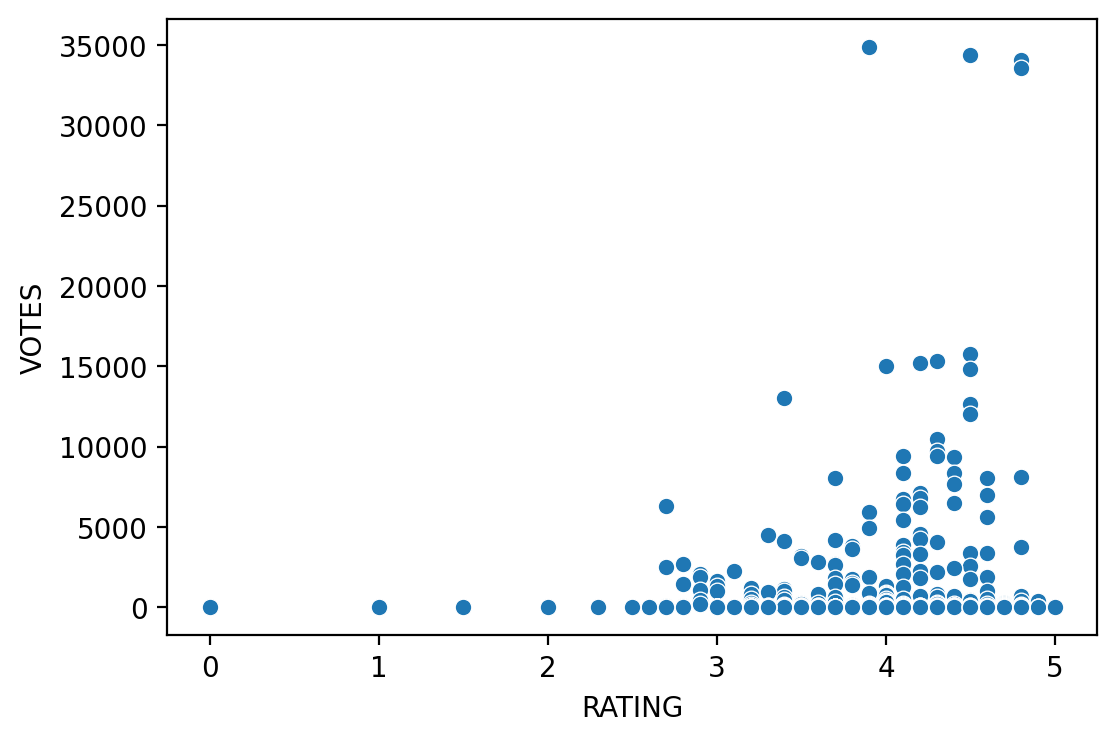

In [ ]:
fig = plt.figure(figsize = (6,4), dpi = 200)
sns.scatterplot(data = fandango, x = 'RATING', y = 'VOTES')

In [ ]:
fandango_num = fandango.select_dtypes(['float64', 'int64'])
corr_fandango = fandango_num.corr()
corr_fandango

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [ ]:
def year(x):
  pattern = r'\d{4}'
  match = re.search(pattern,x)
  return match[0]
fandango["YEAR"] = fandango['FILM'].apply(year)
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [ ]:
fandango.value_counts('YEAR')

YEAR
2015    476
2014     24
1001      1
1964      1
2012      1
2016      1
Name: count, dtype: int64

<ipython-input-33-6638f53fa1ab>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = fandango,x = 'YEAR',palette = 'tab10')


<Axes: xlabel='YEAR', ylabel='count'>

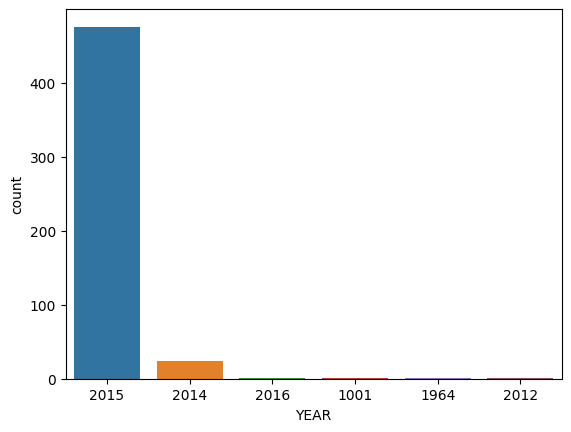

In [ ]:
sns.countplot(data = fandango,x = 'YEAR',palette = 'tab10')

In [ ]:
fandango_top10 = fandango.sort_values(['VOTES'],ascending=False)
fandango_top10.iloc[:10]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [ ]:
fandango.loc[(fandango.VOTES == 0)]

,FILM,STARS,RATING,VOTES,YEAR
435,6 Years (2015),0.0,0.0,0,2015
436,7 Minutes (2015),0.0,0.0,0,2015
437,A Year in Champagne (2015),0.0,0.0,0,2015
438,Balls Out (2015),0.0,0.0,0,2015
439,Before I Wake (2015),0.0,0.0,0,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [ ]:
fandango_without_zero_votes = fandango.loc[(fandango.VOTES > 0)]
fandango_without_zero_votes
fandango_without_zero_votes.describe()

,STARS,RATING,VOTES
count,435.000000,435.000000,435.000000
mean,4.122989,3.911264,1329.937931
std,0.706569,0.691447,4094.328212
min,1.000000,1.000000,1.000000
25%,3.500000,3.500000,6.000000
50%,4.000000,4.000000,28.000000
75%,4.500000,4.400000,404.500000
max,5.000000,5.000000,34846.000000


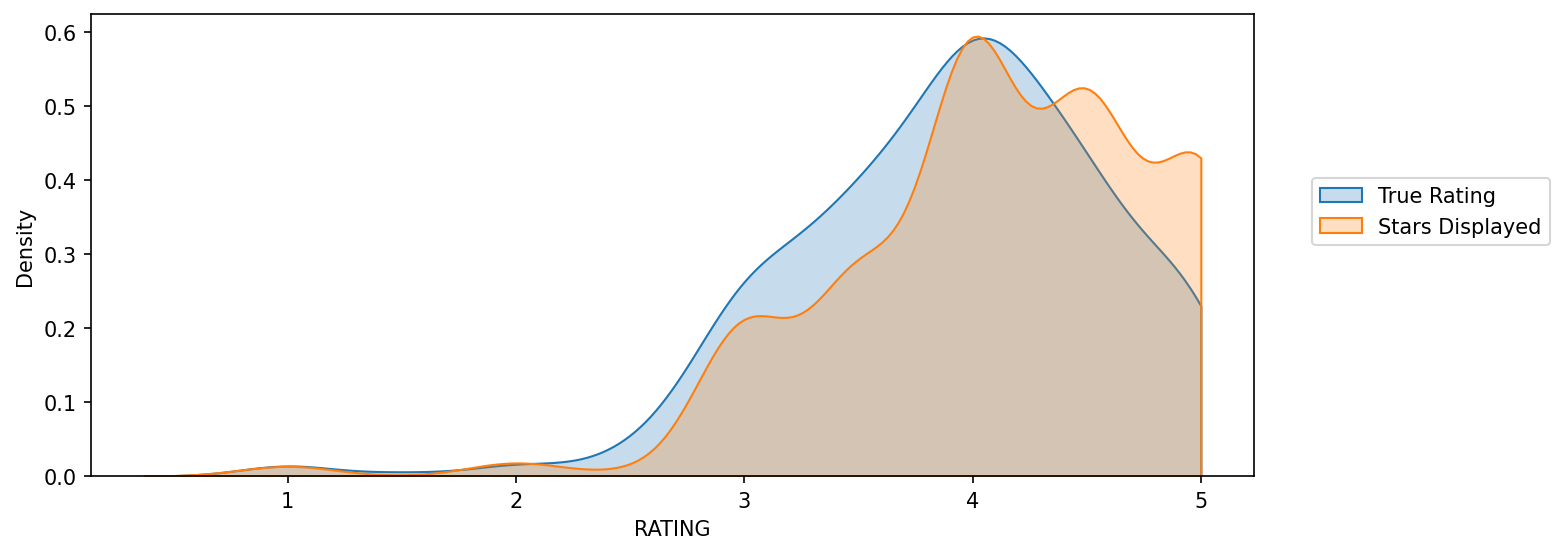

In [ ]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=fandango_without_zero_votes,x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=fandango_without_zero_votes,x='STARS',clip=[0,5],fill=True,label='Stars Displayed')
plt.legend(loc=(1.05,0.5))

In [ ]:
fandango_without_zero_votes['STARS_DIFF'] = round(fandango_without_zero_votes['STARS'] - fandango_without_zero_votes['RATING'],1)
fandango_without_zero_votes

<ipython-input-50-93fadb57272f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_without_zero_votes['STARS_DIFF'] = round(fandango_without_zero_votes['STARS'] - fandango_without_zero_votes['RATING'],1)


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


<ipython-input-51-5364cdaa2441>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = fandango_without_zero_votes, x = 'STARS_DIFF', palette = 'rocket')


<Axes: xlabel='STARS_DIFF', ylabel='count'>

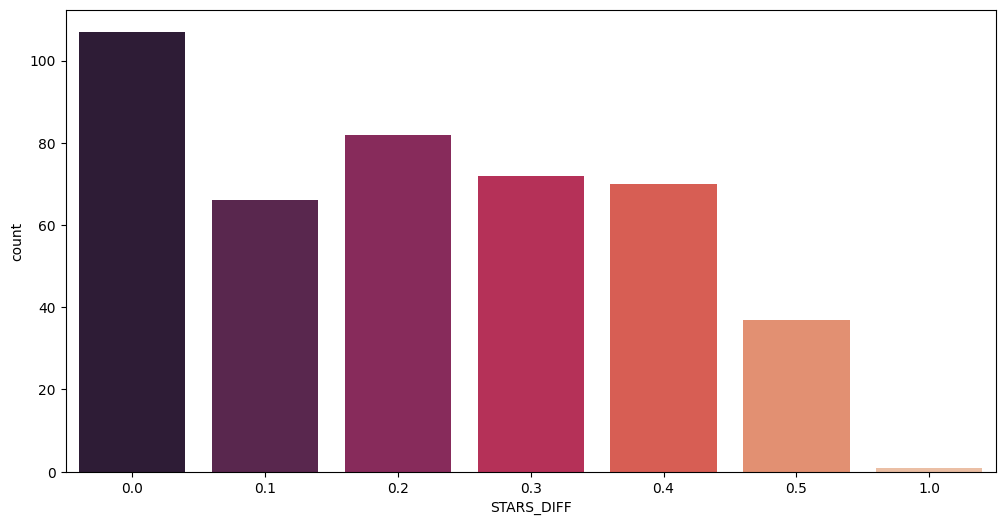

In [ ]:
fig = plt.figure(figsize = (12,6))
sns.countplot(data = fandango_without_zero_votes, x = 'STARS_DIFF', palette = 'rocket')

In [ ]:
fandango_without_zero_votes.describe()

,STARS,RATING,VOTES,STARS_DIFF
count,435.000000,435.000000,435.000000,435.000000
mean,4.122989,3.911264,1329.937931,0.211724
std,0.706569,0.691447,4094.328212,0.168828
min,1.000000,1.000000,1.000000,0.000000
25%,3.500000,3.500000,6.000000,0.100000
50%,4.000000,4.000000,28.000000,0.200000
75%,4.500000,4.400000,404.500000,0.300000
max,5.000000,5.000000,34846.000000,1.000000


In [ ]:
fandango_without_zero_votes.loc[(fandango_without_zero_votes.STARS_DIFF == 1)]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [ ]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [ ]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [ ]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [ ]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


<Axes: xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

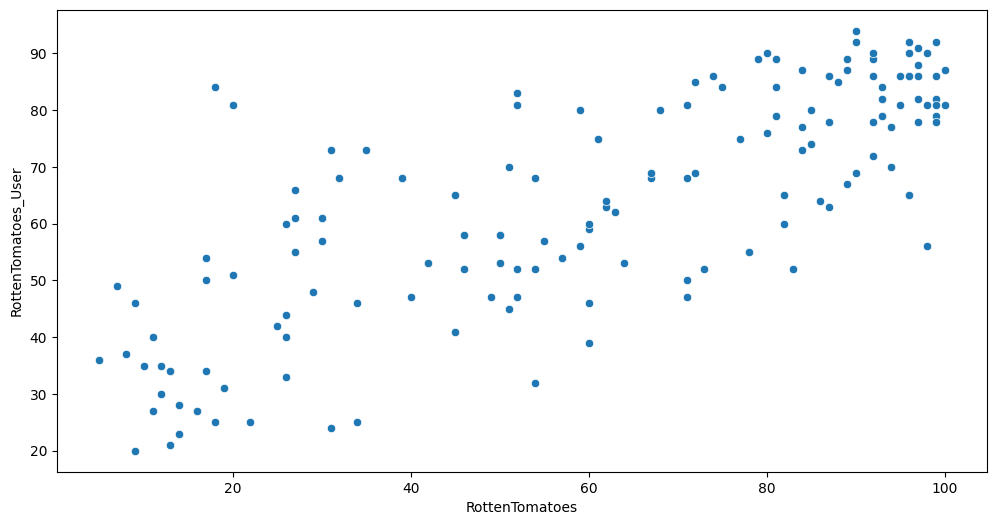

In [ ]:
fig = plt.figure(figsize = (12,6),dpi = 100)
sns.scatterplot(data = all_sites,x = 'RottenTomatoes', y = 'RottenTomatoes_User')

<Axes: xlabel='Metacritic', ylabel='Metacritic_User'>

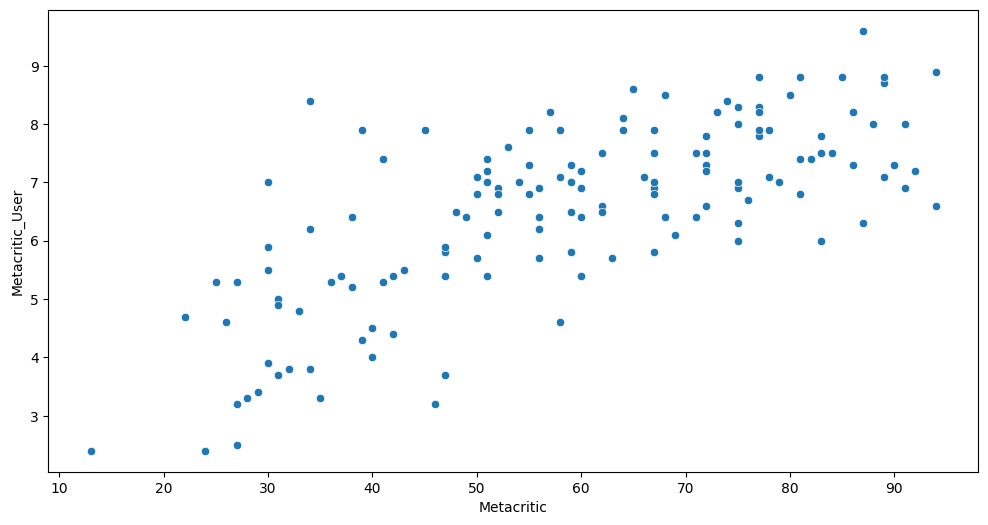

In [ ]:
fig = plt.figure(figsize = (12,6),dpi = 100)
sns.scatterplot(data = all_sites,x = 'Metacritic', y = 'Metacritic_User')

In [ ]:
all_sites['Metacritic_User'] = (all_sites['Metacritic_User'] * 10).astype('int')
all_sites['Rotten_Diff_Tomatoes'] = all_sites.RottenTomatoes - all_sites.RottenTomatoes_User
all_sites['Rotten_Diff_Metacritic'] = all_sites.Metacritic - all_sites.Metacritic_User
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff_Tomatoes,Rotten_Diff_Metacritic
0,Avengers: Age of Ultron (2015),74,86,66,71,7.8,1330,271107,-12,-5
1,Cinderella (2015),85,80,67,75,7.1,249,65709,5,-8
2,Ant-Man (2015),80,90,64,81,7.8,627,103660,-10,-17
3,Do You Believe? (2015),18,84,22,47,5.4,31,3136,-66,-25
4,Hot Tub Time Machine 2 (2015),14,28,29,34,5.1,88,19560,-14,-5


In [ ]:
print(f"Средняя разница в оценках портала Tomatoes составляет {round(abs(all_sites['Rotten_Diff_Tomatoes']).mean(),1)}")
print(f"Средняя разница в оценках портала Metacritic составляет {round(abs(all_sites['Rotten_Diff_Metacritic']).mean(),1)}")

Средняя разница в оценках портала Tomatoes составляет 15.1
Средняя разница в оценках портала Metacritic составляет 11.9


<Axes: xlabel='Rotten_Diff_Tomatoes', ylabel='Count'>

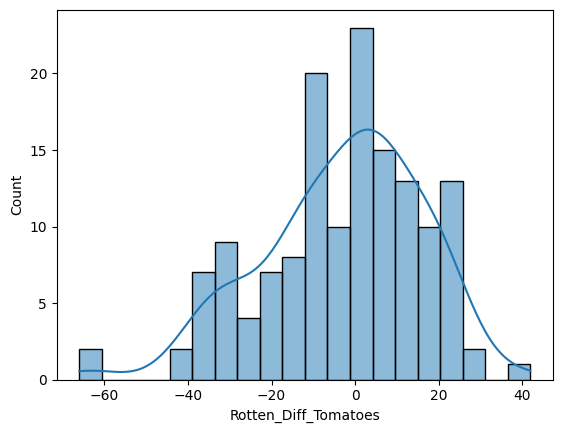

In [ ]:
sns.histplot(data = all_sites, x = 'Rotten_Diff_Tomatoes', kde = True,bins = 20)

Text(0.5, 1.0, 'RT')

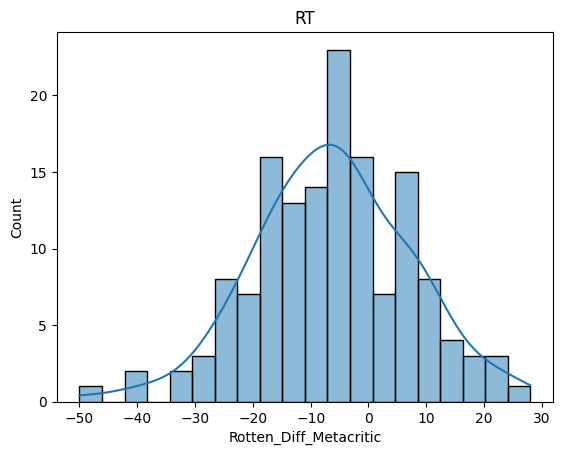

In [ ]:
sns.histplot(data = all_sites, x = 'Rotten_Diff_Metacritic', kde = True,bins = 20)
plt.title('RT')

<Axes: xlabel='Rotten_Diff_Tomatoes', ylabel='Count'>

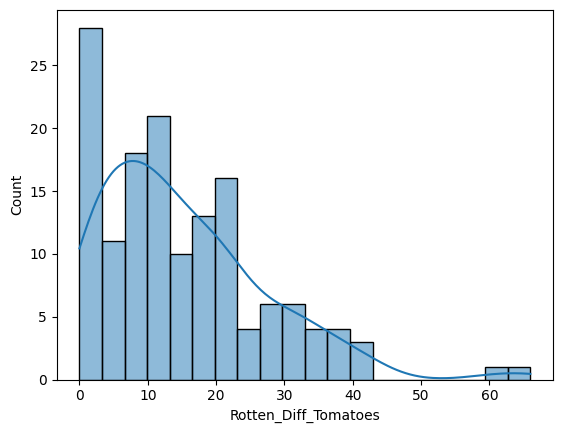

In [ ]:
a_tomatoes = abs(all_sites.Rotten_Diff_Tomatoes)
sns.histplot(data = all_sites, x = a_tomatoes, kde = True,bins = 20)

<Axes: xlabel='Rotten_Diff_Metacritic', ylabel='Count'>

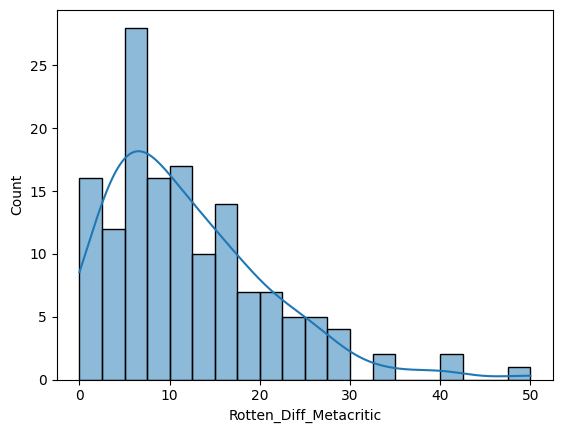

In [ ]:
a_Metacritic = abs(all_sites.Rotten_Diff_Metacritic)
sns.histplot(data = all_sites, x = a_Metacritic, kde = True,bins = 20)

In [ ]:
df_merge = fandango_without_zero_votes.merge(all_sites, how = 'inner', on = 'FILM')
df_merge

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff_Tomatoes,Rotten_Diff_Metacritic
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,32,4.2,778,179506,-17,14
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,70,7.3,1281,241807,-10,-11
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,66,7.4,850,251856,-13,6
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,68,7.4,764,207211,-3,-1
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,89,8.6,807,96252,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,0.0,87,63,68,64,6.7,19,5289,24,4
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,0.4,95,81,87,63,7.0,18,1107,14,24
142,The Wrecking Crew (2015),4.5,4.2,38,2015,0.3,93,84,67,70,7.8,4,732,9,-3
143,Tangerine (2015),4.0,3.9,36,2015,0.1,95,86,86,73,7.4,14,696,9,13


In [ ]:
df_merge.isna().sum()

FILM                          0
STARS                         0
RATING                        0
VOTES                         0
YEAR                          0
STARS_DIFF                    0
RottenTomatoes                0
RottenTomatoes_User           0
Metacritic                    0
Metacritic_User               0
IMDB                          0
Metacritic_user_vote_count    0
IMDB_user_vote_count          0
Rotten_Diff_Tomatoes          0
Rotten_Diff_Metacritic        0
dtype: int64

In [ ]:
df_num = pd.DataFrame()
df_num[['STARS', 'RATING', 'RottenTomatoes', 'Metacritic', 'IMDB']] = df_merge[['STARS', 'RATING', 'RottenTomatoes', 'Metacritic', 'IMDB']]
df_std = pd.DataFrame()
for col in df_num.columns:
  m = df_num[col].mean()
  s = df_num[col].std()
  df_std[col + '_n'] = abs((df_num[col]- m)/s)
df_std.head()

,STARS_n,RATING_n,RottenTomatoes_n,Metacritic_n,IMDB_n
0,0.159298,0.116673,1.181472,0.649833,2.640714
1,0.764628,1.310853,0.343672,0.015531,0.595384
2,1.688554,1.907944,0.376827,0.680895,0.699775
3,1.688554,1.907944,0.675225,0.424986,0.699775
4,0.764628,1.310853,1.238865,1.806895,1.952458


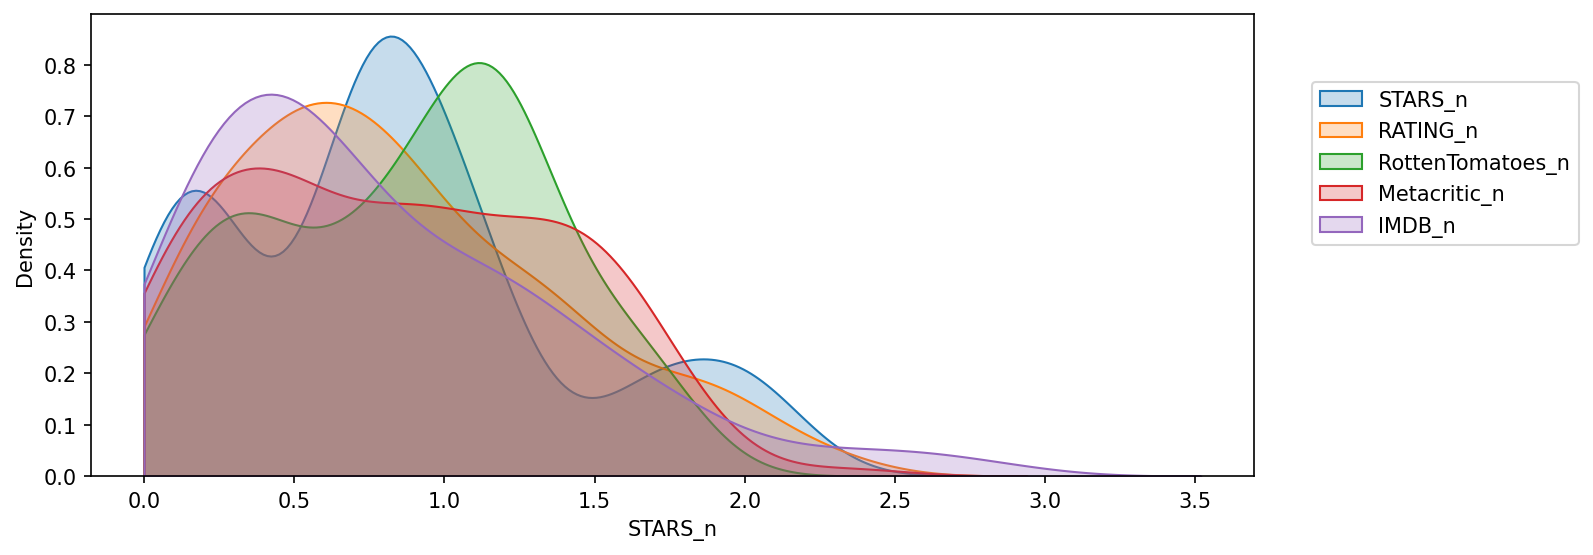

In [ ]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=df_std,x='STARS_n',clip=[0,5],fill=True,label='STARS_n')
sns.kdeplot(data=df_std,x='RATING_n',clip=[0,5],fill=True,label='RATING_n')
sns.kdeplot(data=df_std,x='RottenTomatoes_n',clip=[0,5],fill=True,label='RottenTomatoes_n')
sns.kdeplot(data=df_std,x='Metacritic_n',clip=[0,5],fill=True,label='Metacritic_n')
sns.kdeplot(data=df_std,x='IMDB_n',clip=[0,5],fill=True,label='IMDB_n')
plt.legend(loc=(1.05,0.5))